In [8]:
import pydicom
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file
import os
import glob
import numpy as np
from pydicom.dataset import Dataset
import imageio
import SimpleITK as sitk
import pydicom

SEG = "/data4/hrehman/Clinical Data/3-13-2023/R01-001/SEG/1-198.dcm"


In [9]:
dcms = dcmread(SEG)

In [10]:
reference_CT = dcms[0x0008, 0x1115][0][0x0008, 0x114a]
segmentation_dict = {}

In [15]:
# dcms

In [63]:
for i,seg in enumerate(reference_CT):
    seg_array = seg[0x0008, 0x1155].value
    seg_array = dcms.pixel_array
    seg_filter = seg_array[i]
    segmentation_dict[seg[0x0008, 0x1155].value] = seg_filter

In [64]:
pixel_array = list(segmentation_dict.values())

In [27]:
fst = pixel_array[0]

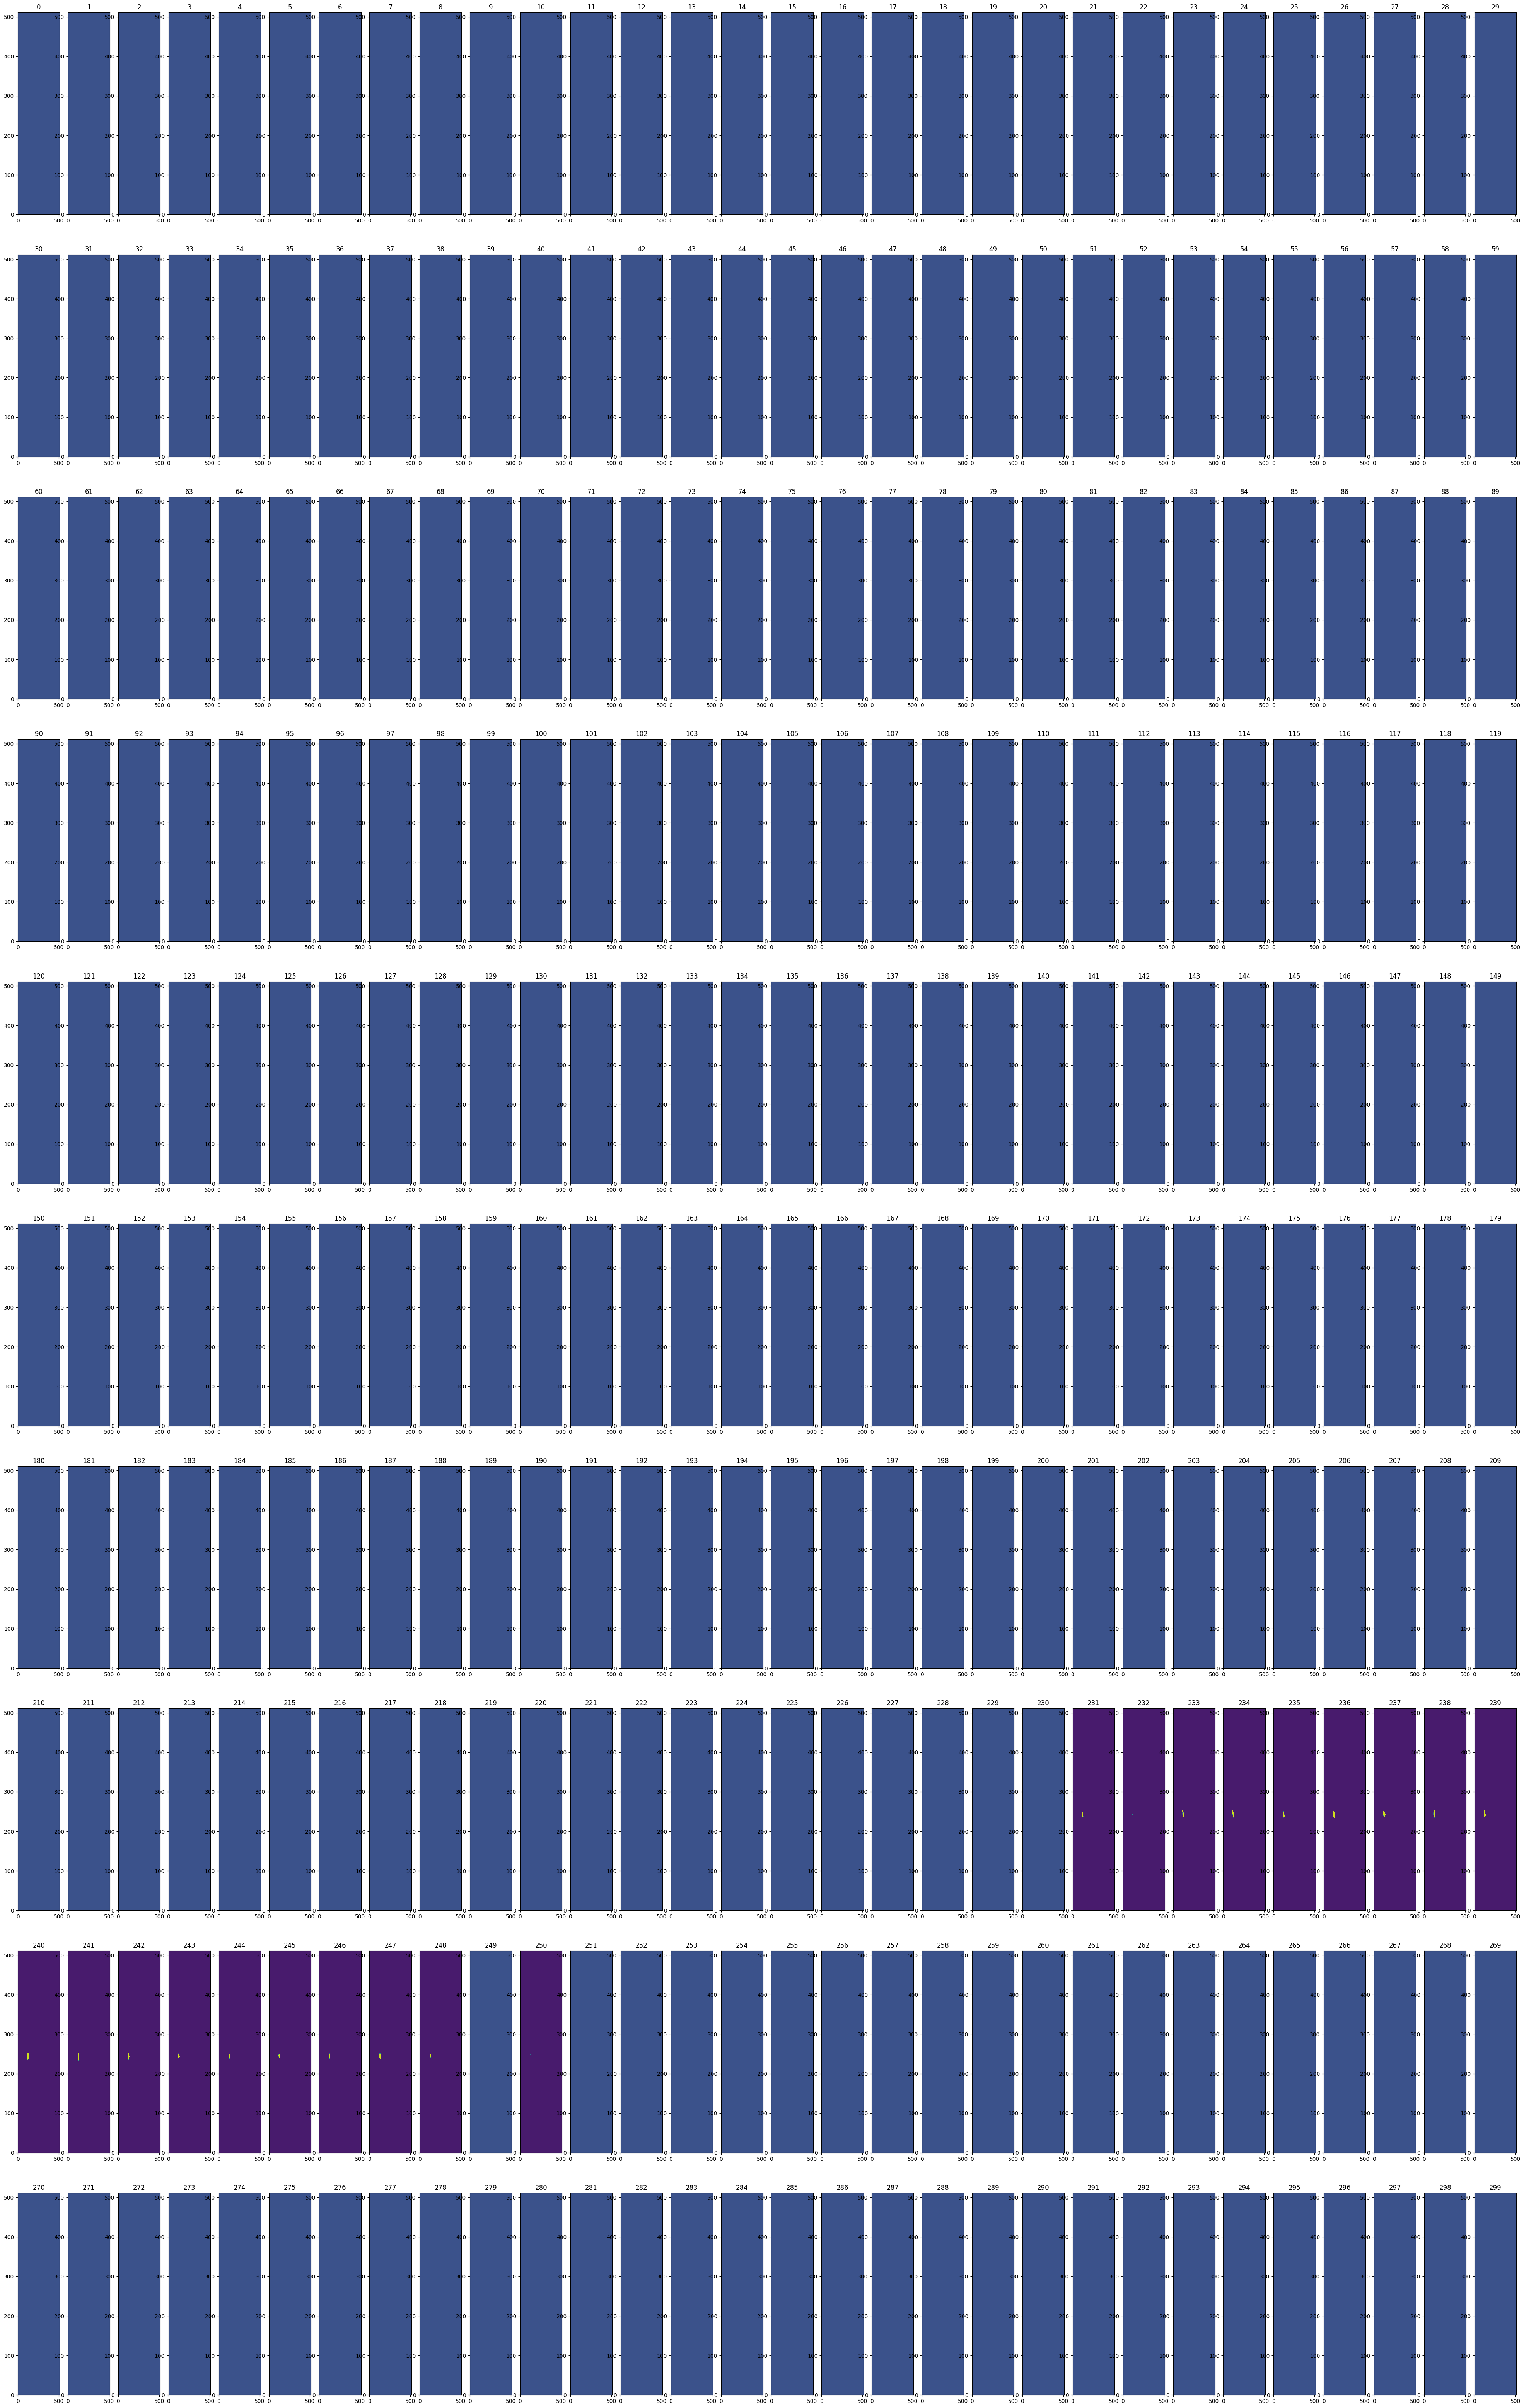

In [28]:
fig, axs = plt.subplots(10,30, figsize=(50, 80), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(300):
    axs[i].contourf(pixel_array[i])
    axs[i].set_title(i)

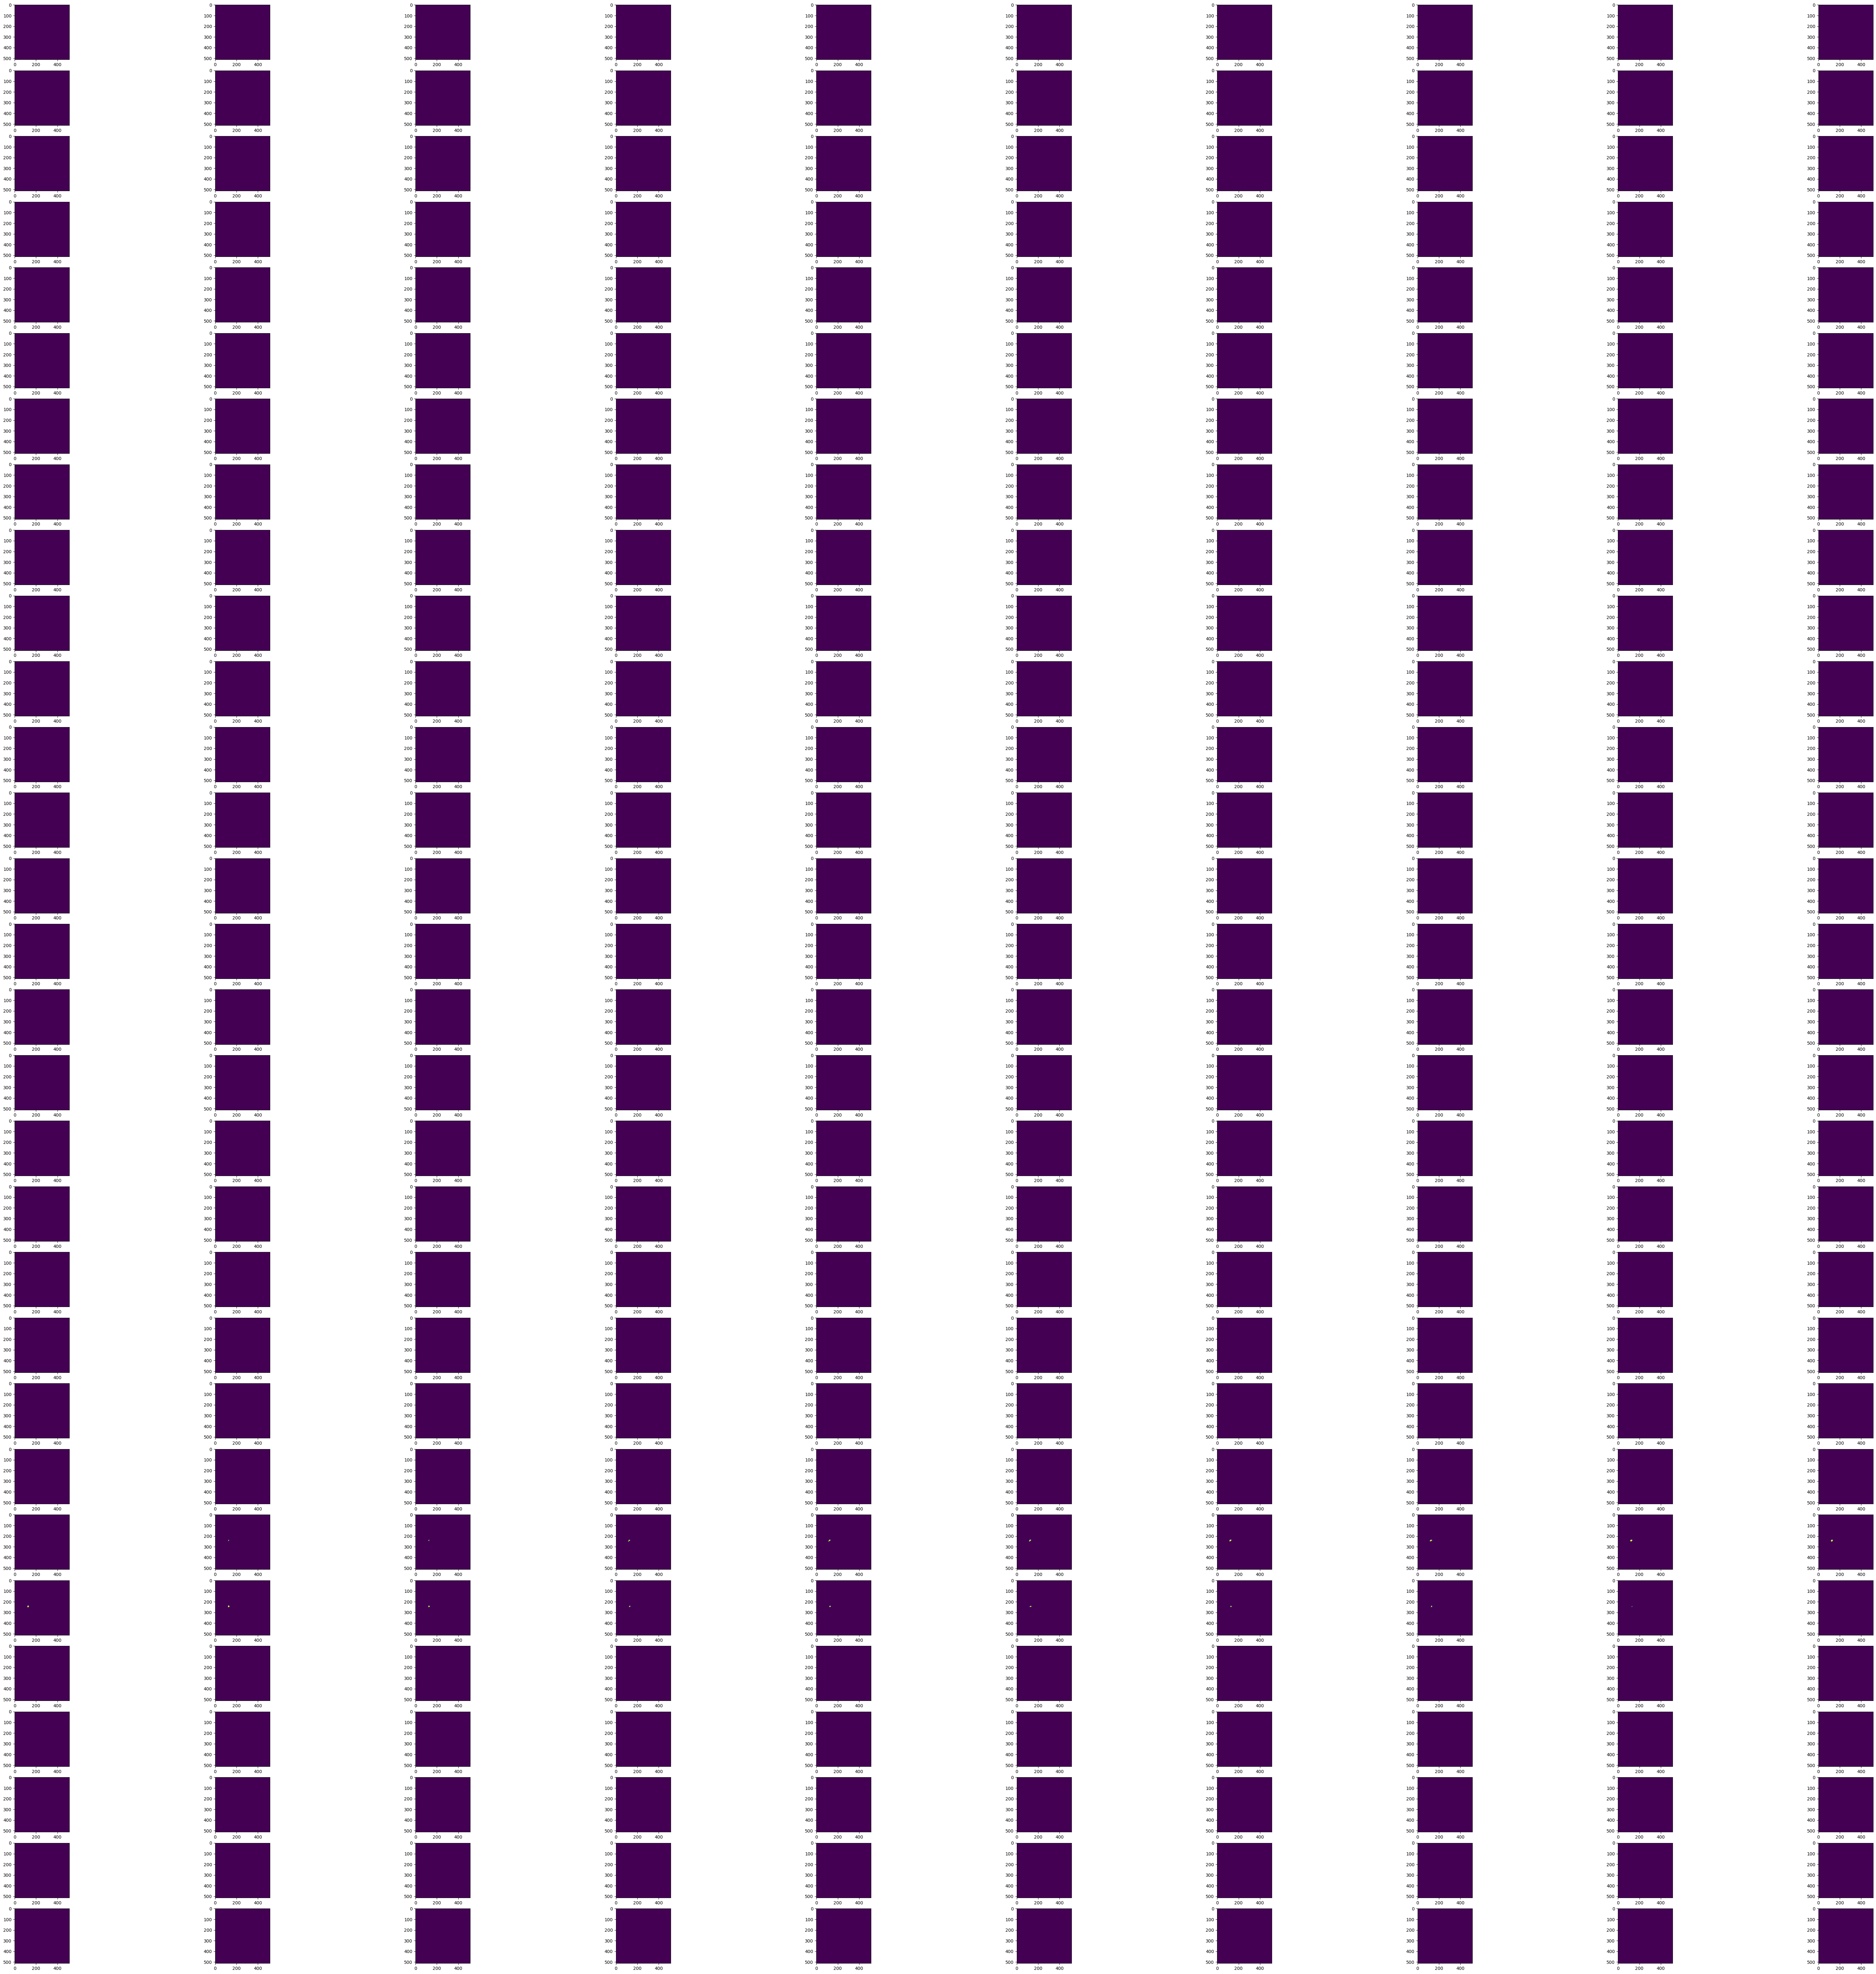

In [32]:
_, axs = plt.subplots(30, 10, figsize=(80, 80))
axs = axs.flatten()
for img, ax in zip(pixel_array, axs):
    ax.imshow(img)
plt.show()

In [89]:
new_pixel_array = []
for img in pixel_array:
    countzero = np.count_nonzero(img)
    if countzero !=0:
        new_pixel_array.append(img)

In [97]:
len(new_pixel_array)

19

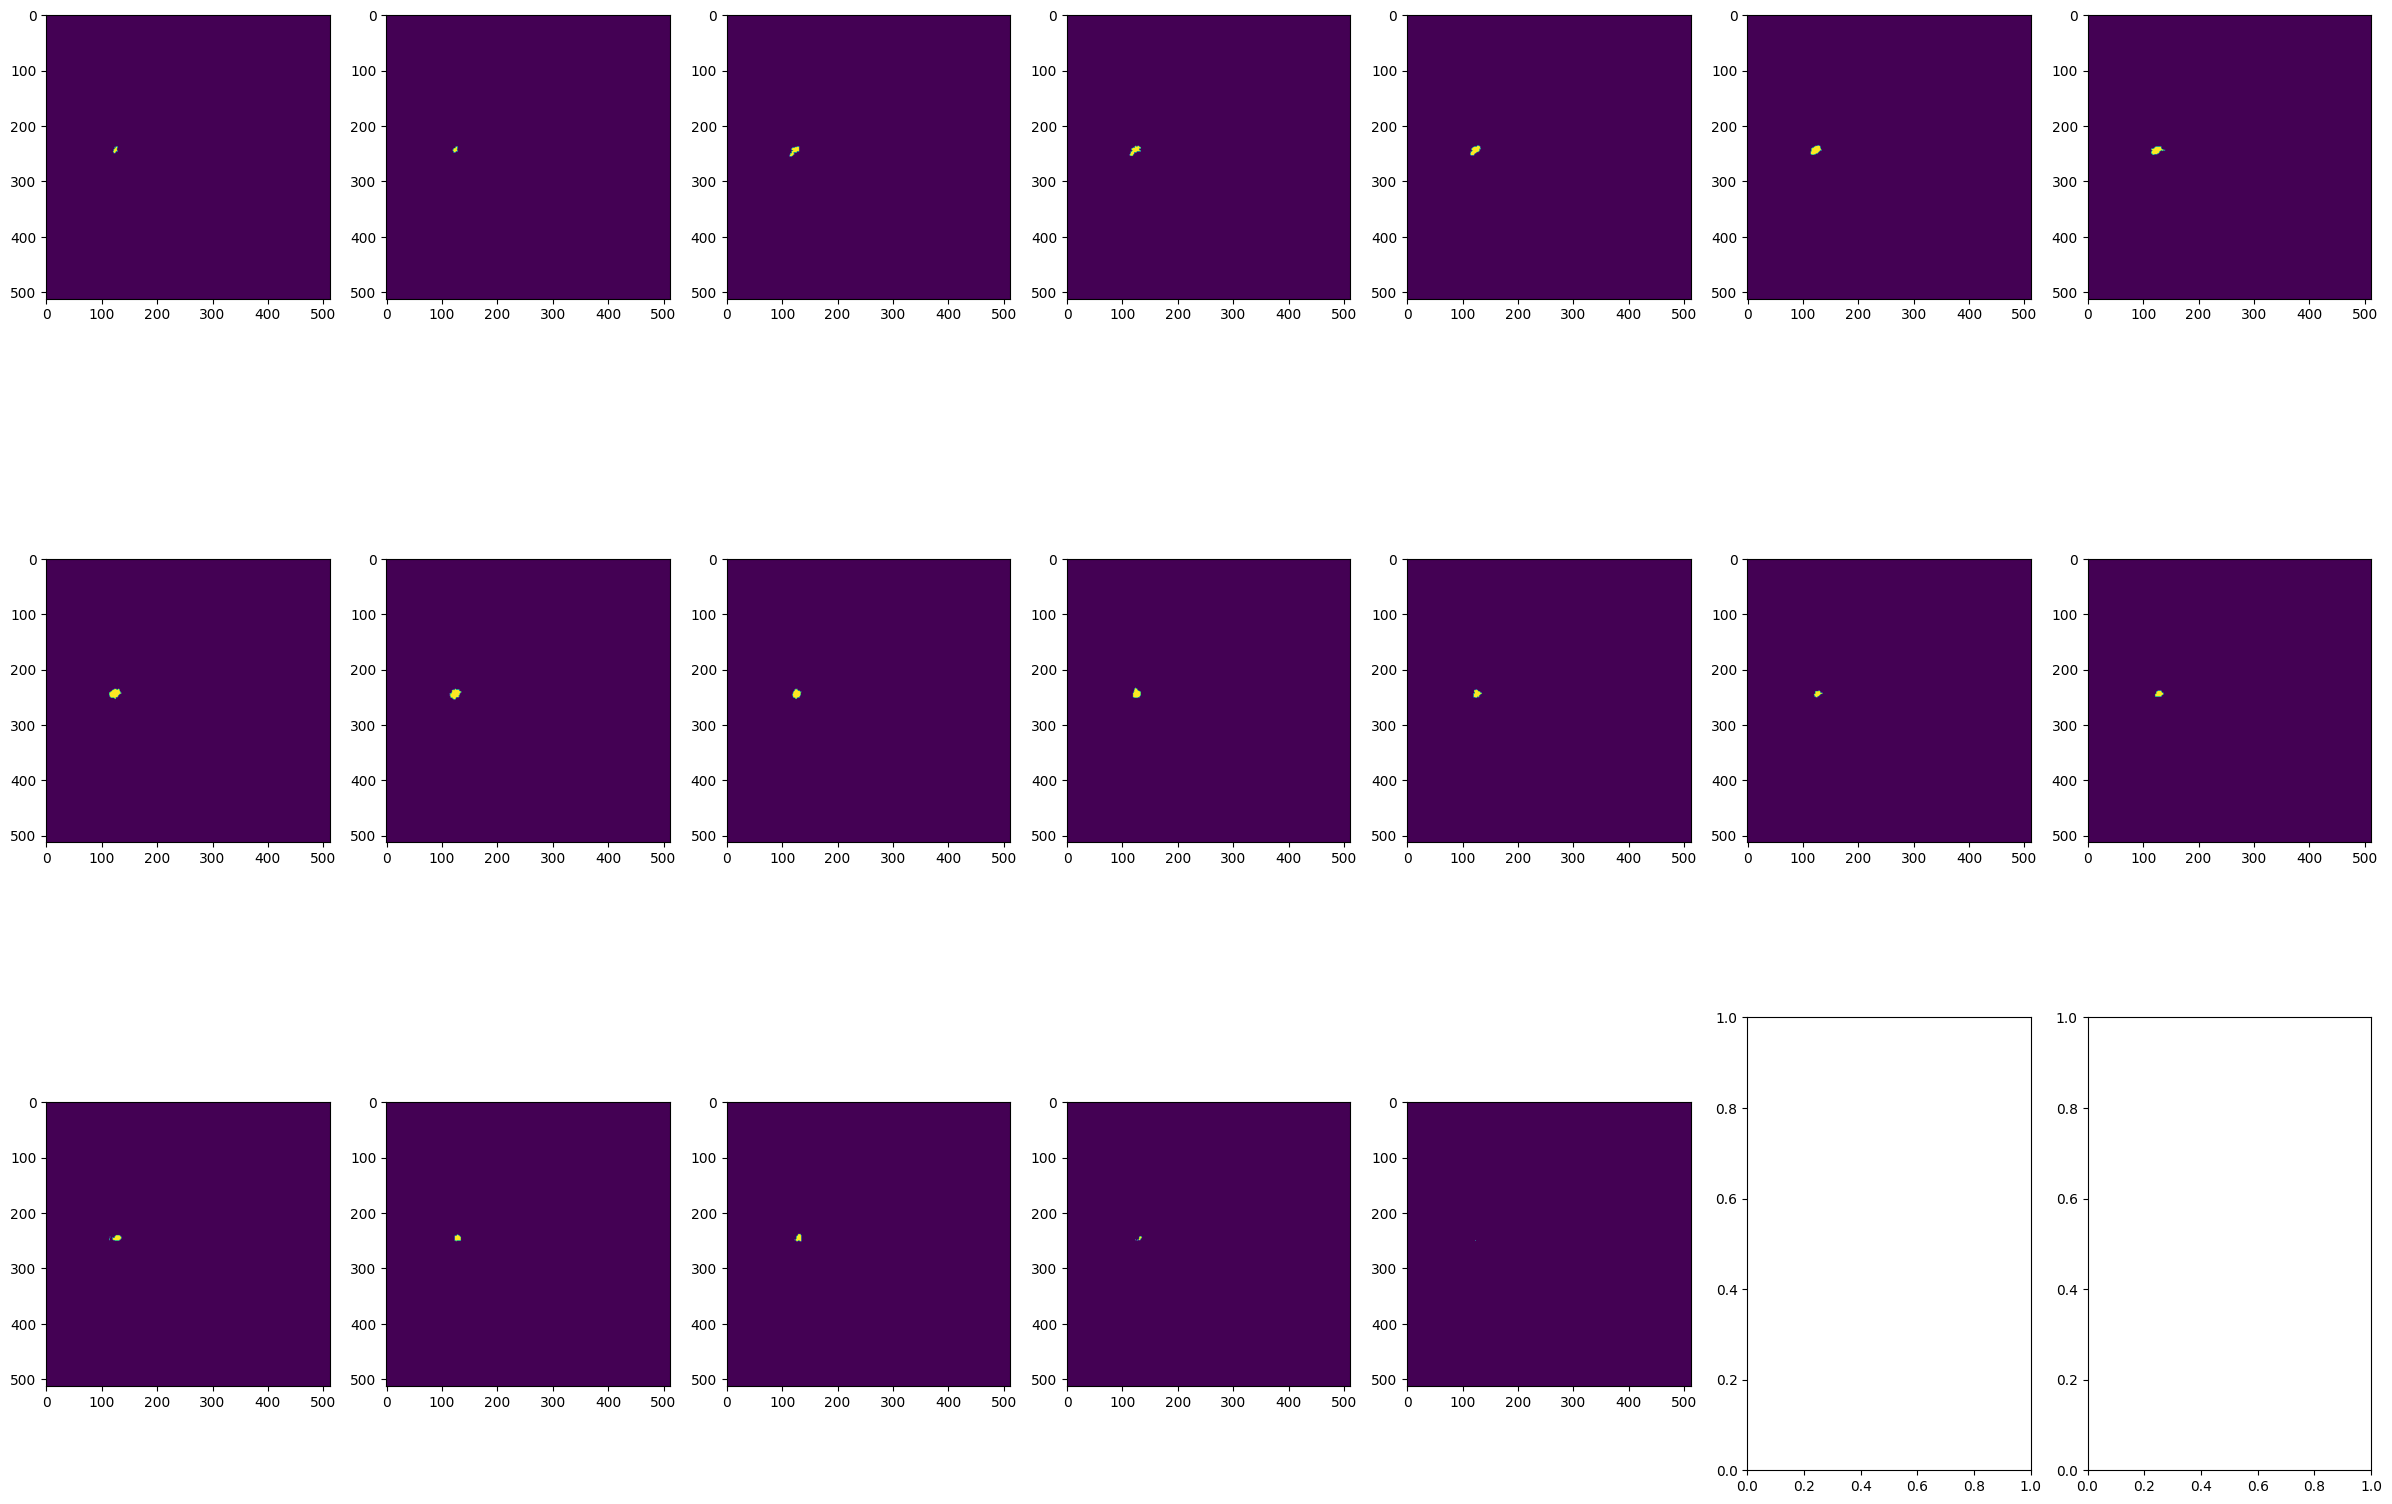

In [98]:
_, axs = plt.subplots(3,7 , figsize=(30, 20))
axs = axs.flatten()
for img, ax in zip(new_pixel_array, axs):
    ax.imshow(img)
plt.show()  